# Analysis of Thermal Images

Analysis below could only be classified as qualitative thermal analysis

## Importing libraries 

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import glob
import skimage.color
import skimage.io
import skimage.color as color
import skimage.transform as transform
import skimage.filters as filters
from skimage import io

## Reading & showing images

In [2]:
## print image list
file_list = glob.glob(r'img\A0\*.*')
print(file_list)

['img\\A0\\imga-0001.jpg', 'img\\A0\\imga-0002.jpg', 'img\\A0\\imga-0003.jpg', 'img\\A0\\imga-0004.jpg', 'img\\A0\\imga-0005.jpg', 'img\\A0\\imga-0006.jpg', 'img\\A0\\imga-0007.jpg', 'img\\A0\\imga-0008.jpg', 'img\\A0\\imga-0009.jpg', 'img\\A0\\imga-0010.jpg', 'img\\A0\\imga-0011.jpg', 'img\\A0\\imga-0012.jpg', 'img\\A0\\imga-0013.jpg', 'img\\A0\\imga-0014.jpg', 'img\\A0\\imga-0015.jpg', 'img\\A0\\imga-0016.jpg', 'img\\A0\\imga-0017.jpg', 'img\\A0\\imga-0018.jpg', 'img\\A0\\imga-0019.jpg', 'img\\A0\\imga-0020.jpg']


In [59]:
## import image as normal and grayscale
## default images
img_df = []
for file in file_list:
    im = io.imread(file, as_gray=False)
    img_df.append(im)
## grayscale images
img_gr = []
for file in file_list:
    im = io.imread(file, as_gray=True)
    img_gr.append(im)

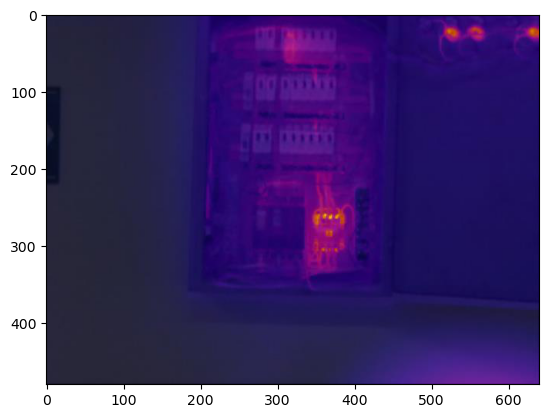

In [30]:
## code for showing individual image
plt.imshow(img_df[15], cmap='gray') 
plt.show()

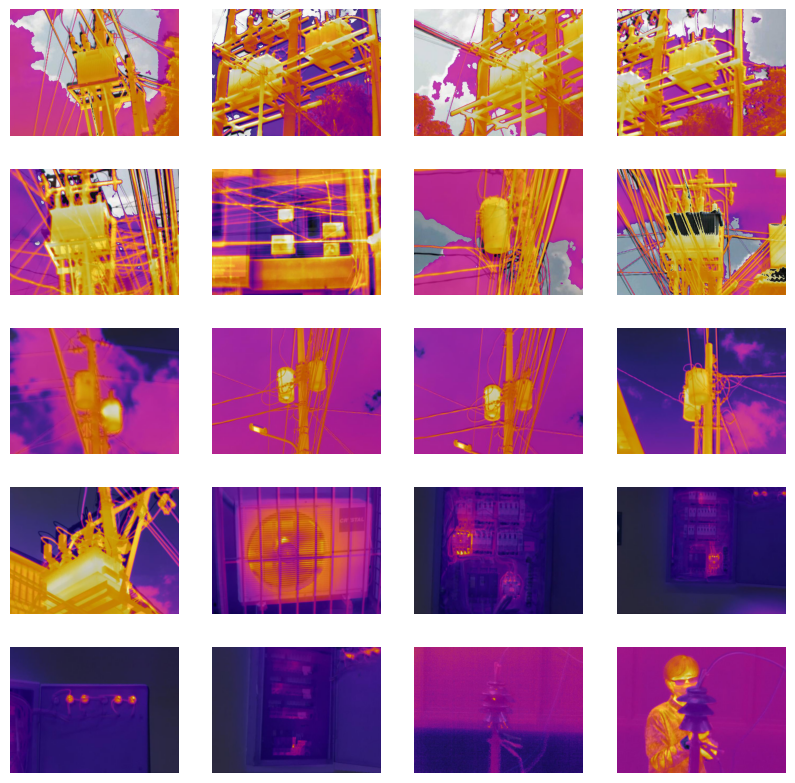

In [29]:
# load the images
img_df = io.imread_collection(file_list)

# create figure and axis objects
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(10, 10))

# loop through the axes and display each image
for i, ax in enumerate(axs.flatten()):
    ax.imshow(img_df[i])
    ax.axis("off")

plt.show()

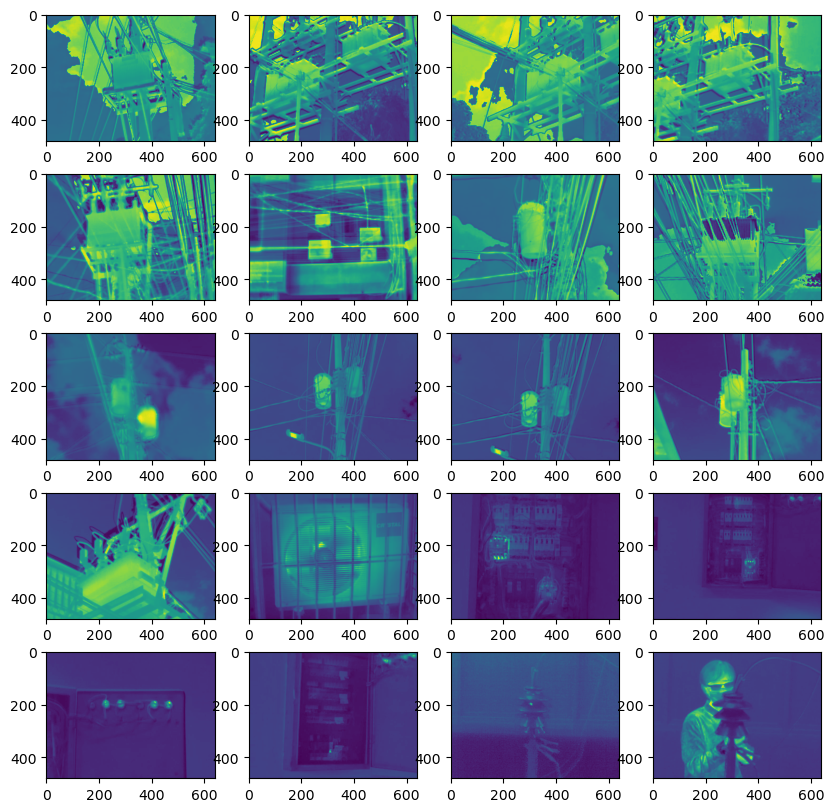

In [5]:
## code for showing all image
plt.figure(figsize=(10,10)) # grid size
for i in range(20):
    plt.subplot(5,4,i+1)    # grid 5x3
    plt.imshow(img_gr[i])
plt.show()

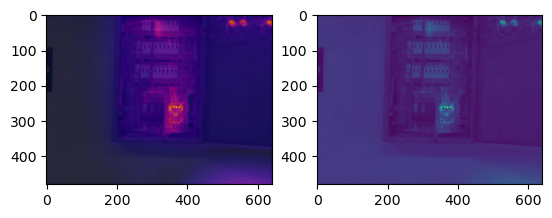

In [6]:
## code for showing 2 images side by side
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_df[15])
ax[1].imshow(img_gr[15])

## Grayscale analysis

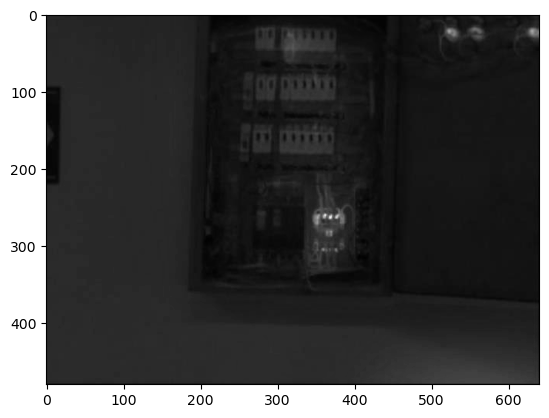

In [7]:
## grayscale analysis could be applied to grayscale images
## show grayscale image

fig, ax = plt.subplots()
plt.imshow(img_gr[15], cmap='gray')
plt.show()

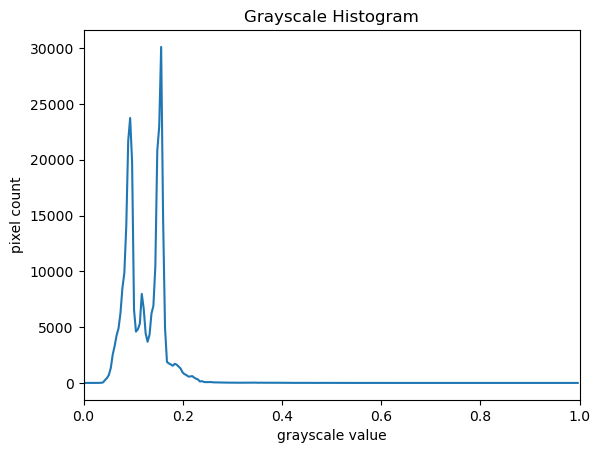

In [8]:
# creating histogram
histogram, bin_edges = np.histogram(img_gr[15], bins=256, range=(0, 1))
# configure and draw the histogram figure
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.show()

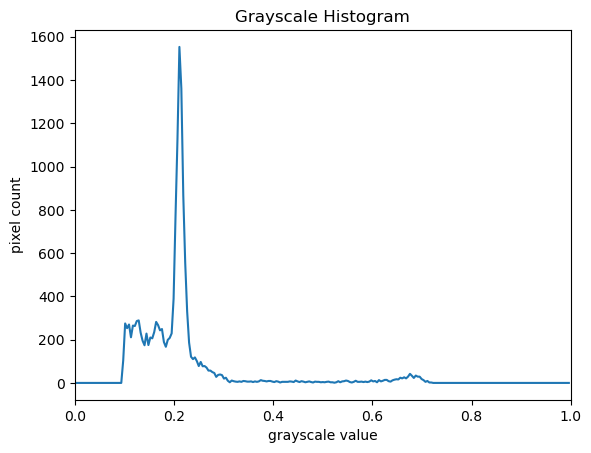

In [19]:
image = img_gr[i]
# create mask here, using np.zeros() and skimage.draw.rectangle()
mask = np.zeros(shape=image.shape, dtype="bool")
rr, cc = skimage.draw.rectangle(start=(200, 300), end=(350, 400))
mask[rr, cc] = True

# display the mask
#fig, ax = plt.subplots()
#plt.imshow(mask, cmap='gray')
#plt.show()

# mask the image and create the new histogram
histogram, bin_edges = np.histogram(image[mask], bins=256, range=(0.0, 1.0))

# configure and draw the histogram figure
plt.figure()

plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])
plt.plot(bin_edges[0:-1], histogram)

plt.show()

## Marker Analysis

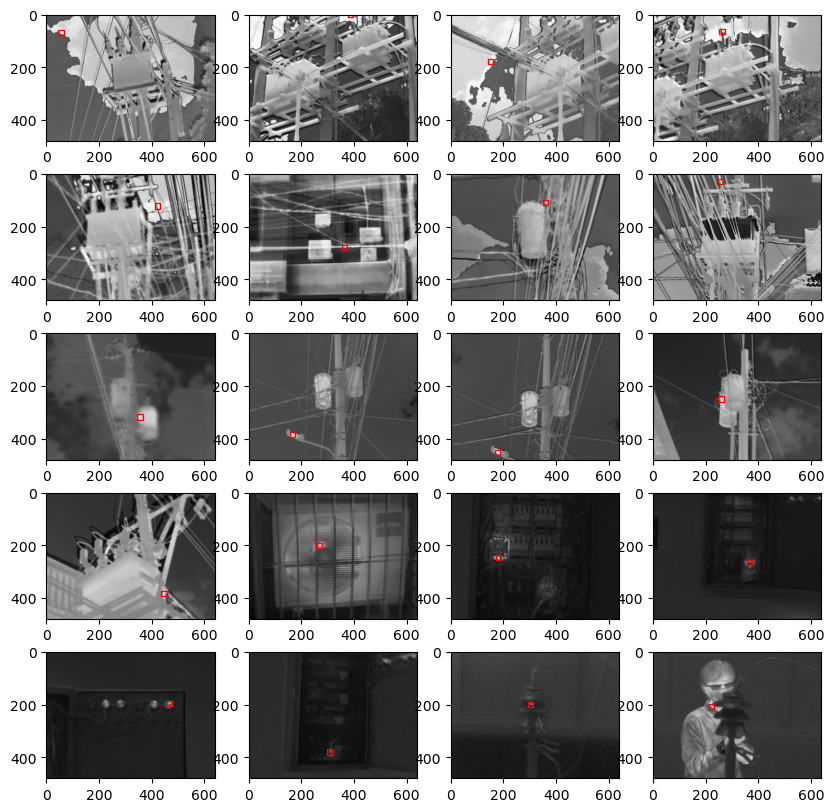

In [26]:
plt.figure(figsize=(10,10)) # grid size
for i in range(20):
    plt.subplot(5,4,i+1)    # grid 5x4
    
    # convert grayscale image to RGB format
    img_rgb = skimage.color.gray2rgb(img_gr[i])
    
    plt.imshow(img_rgb)
    
    # find the pixel with maximum R value
    max_r_index = np.argmax(img_rgb[:, :, 0]) # index of pixel with max R value
    
    # get the x, y coordinates of the pixel
    max_r_y, max_r_x = np.unravel_index(max_r_index, img_rgb[:, :, 0].shape)
    
    # draw a rectangle around the pixel
    rect = patches.Rectangle((max_r_x-10,max_r_y-10),20,20,linewidth=1,edgecolor='r',facecolor='none')
    plt.gca().add_patch(rect)
    
plt.show()



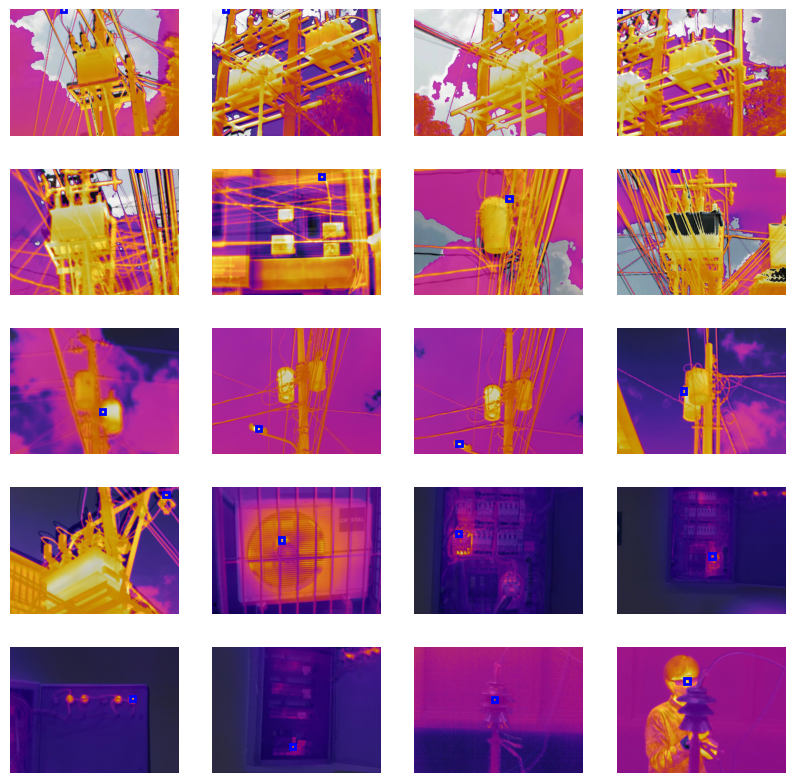

In [39]:
# load the images
img_df = io.imread_collection(file_list)

# resize images to a common size
img_df_resized = []
for img in img_df:
    img_resized = transform.resize(img, (480, 640), anti_aliasing=True)
    img_df_resized.append(img_resized)

# create figure and axis objects
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(10, 10))

# loop through the axes and display each image
for i, ax in enumerate(axs.flatten()):
    # convert image to RGB format
    img_rgb =img_df_resized[i]
    
    ax.imshow(img_rgb)
    
    # find the pixel with maximum R value
    max_r_index = np.argmax(img_rgb[:, :, 0]) # index of pixel with max R value
    
    # get the x, y coordinates of the pixel
    max_r_y, max_r_x = np.unravel_index(max_r_index, img_rgb[:, :, 0].shape)
    
    # draw a rectangle around the pixel
    rect = patches.Rectangle((max_r_x-10,max_r_y-10),20,20,linewidth=2,edgecolor='b',facecolor='none')
    ax.add_patch(rect)
    
    ax.axis("off")

plt.show()


## RGB Counts

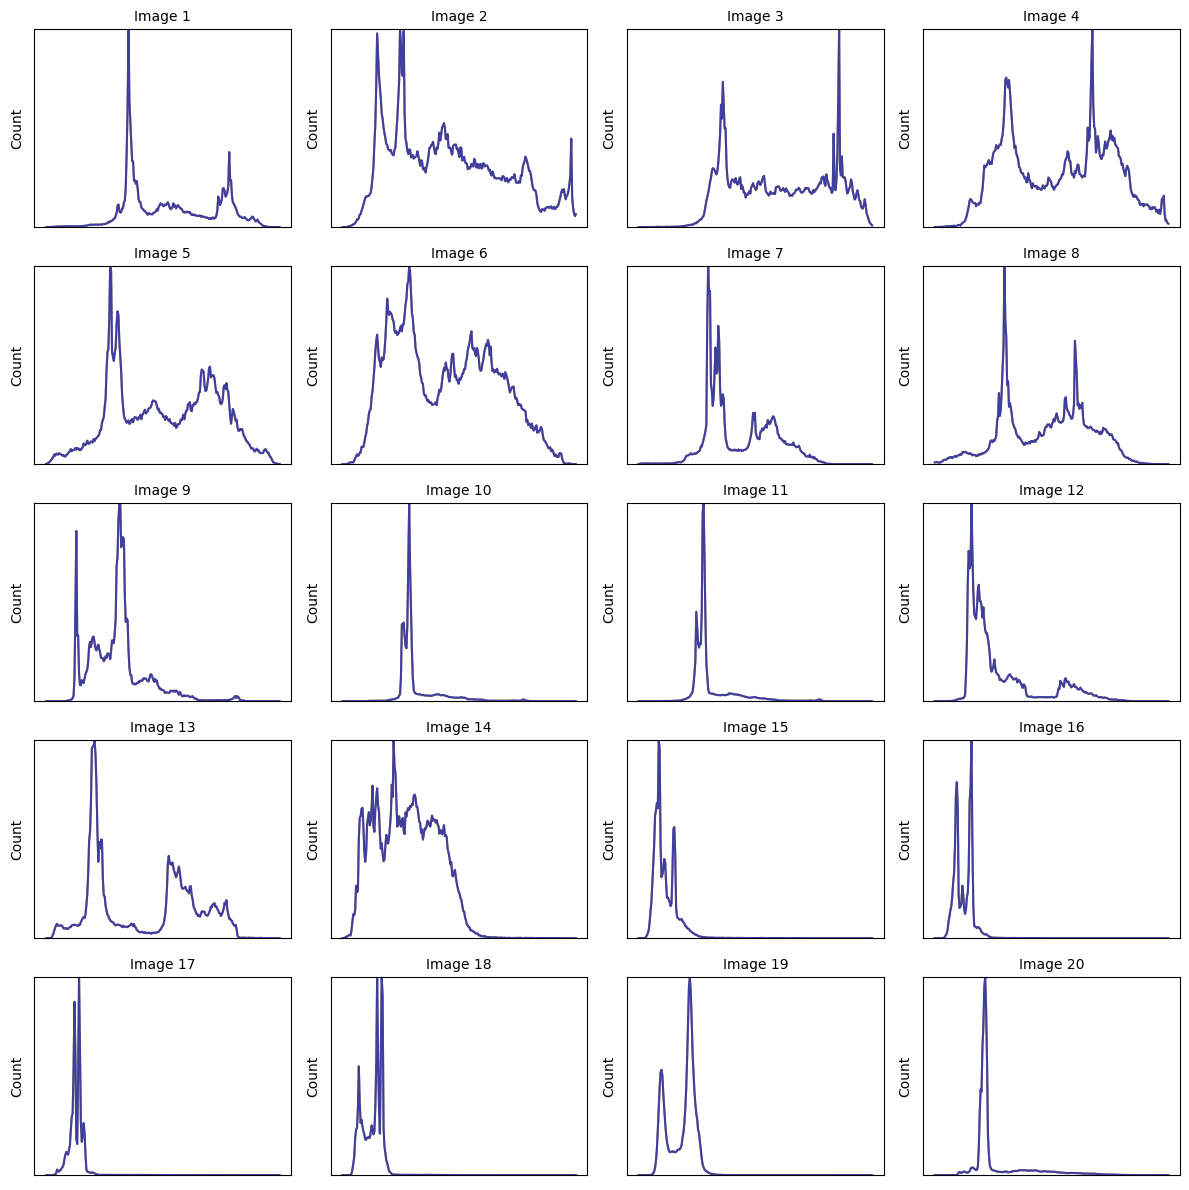

In [43]:
# create figure and axis objects
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(12, 12))

# loop through the axes and display the histograms
for i, ax in enumerate(axs.flatten()):
    # convert image to RGB format
    img_rgb = color.gray2rgb(img_gr[i])
    
    # compute and plot the histograms
    for j, c in enumerate(['r', 'g', 'b']):
        hist, bins = np.histogram(img_rgb[:, :, j], bins=256, range=(0, 1))
        ax.plot(bins[:-1], hist, color=c, alpha=0.5)
        ax.set_ylim([0, np.max(hist)])
        ax.set_yticks([])
        ax.set_xticks([])
        if j == 0:
            ax.set_title(f"Image {i+1}", fontsize=10)
            ax.set_ylabel("Count", fontsize=10)
    
plt.tight_layout()
plt.show()


In [47]:
# set the number of columns and rows
n_cols = 3
n_rows = int(np.ceil(len(img_df) / n_cols))

# loop through the images and print the R, G, B values
for i, img in enumerate(img_df):
    # convert image to RGB format
    img_rgb = color.gray2rgb(img)
    
    # compute the R, G, B values
    r_mean = np.mean(img_rgb[:, :, 0])
    g_mean = np.mean(img_rgb[:, :, 1])
    b_mean = np.mean(img_rgb[:, :, 2])
    
    # print the R, G, B values
    print(f"Image {i+1}: R={r_mean:.2f} G={g_mean:.2f} B={b_mean:.2f}", end="")
    
    # add spacing to align the columns
    if (i+1) % n_cols == 0:
        print("\n")
    else:
        print("\t", end="")

Image 1: R=194.68 G=118.79 B=116.90	Image 2: R=175.00 G=101.27 B=85.54	Image 3: R=203.06 G=144.77 B=108.44

Image 4: R=190.15 G=124.38 B=97.93	Image 5: R=184.87 G=116.46 B=96.62	Image 6: R=176.89 G=95.96 B=86.17

Image 7: R=183.45 G=88.51 B=100.98	Image 8: R=173.39 G=108.67 B=95.34	Image 9: R=150.90 G=52.83 B=117.75

Image 10: R=173.41 G=48.54 B=125.01	Image 11: R=166.23 G=47.16 B=127.43	Image 12: R=108.32 G=55.56 B=110.55

Image 13: R=142.13 G=96.95 B=77.11	Image 14: R=148.19 G=44.49 B=104.86	Image 15: R=52.50 G=14.72 B=102.57

Image 16: R=44.28 G=21.93 B=93.85	Image 17: R=45.85 G=23.49 B=97.64	Image 18: R=50.49 G=20.95 B=108.31

Image 19: R=118.21 G=18.24 B=126.16	Image 20: R=156.55 G=34.47 B=119.17	

## Anomalous

### Greyscale

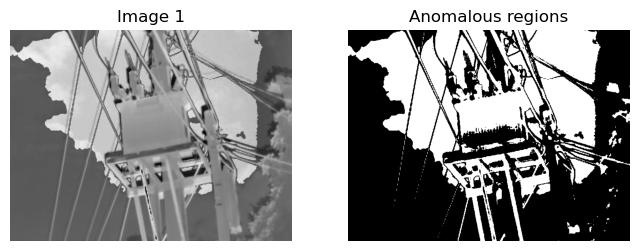

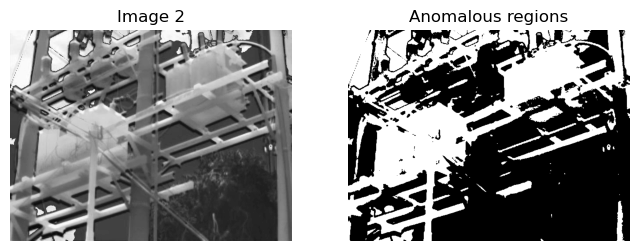

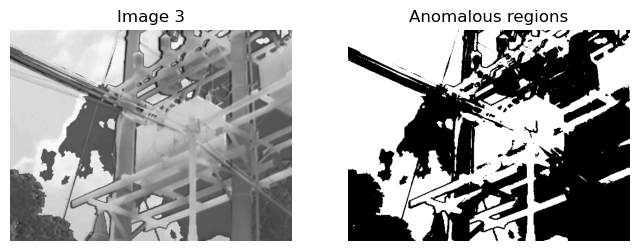

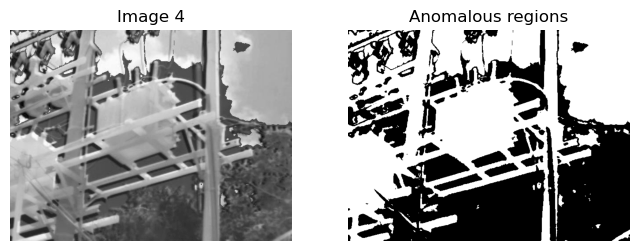

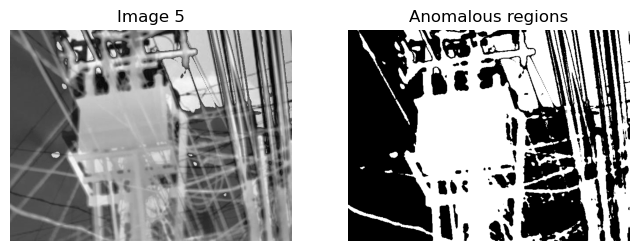

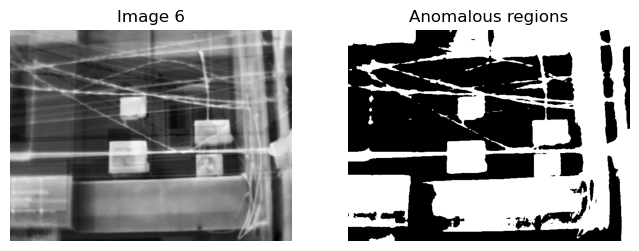

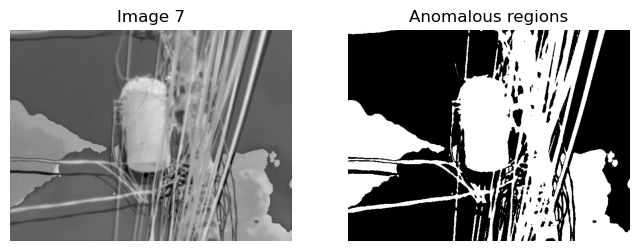

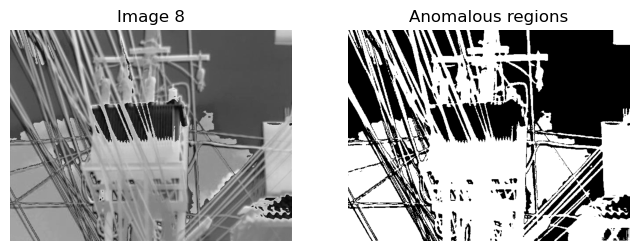

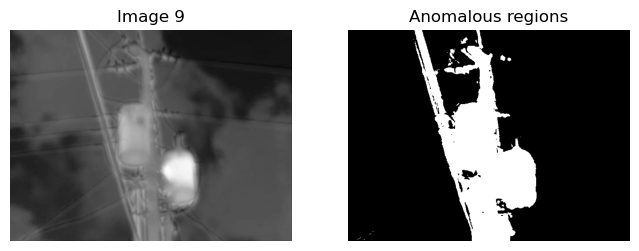

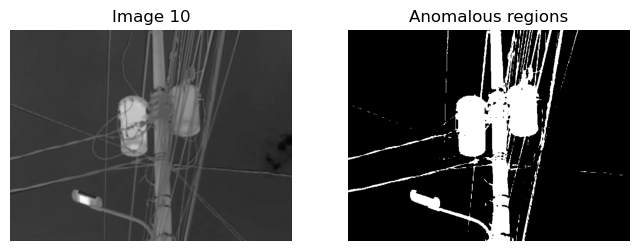

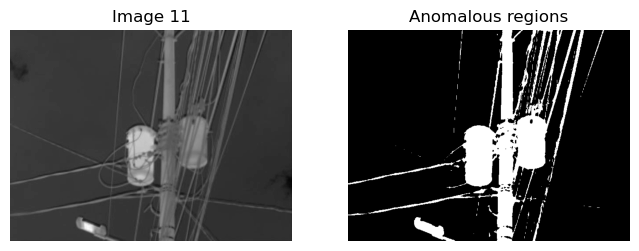

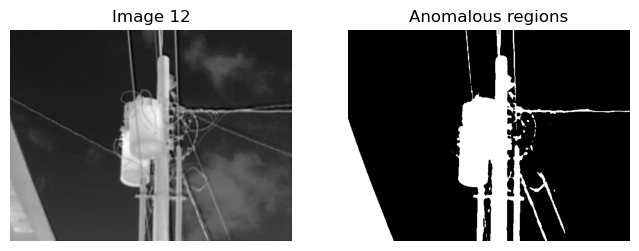

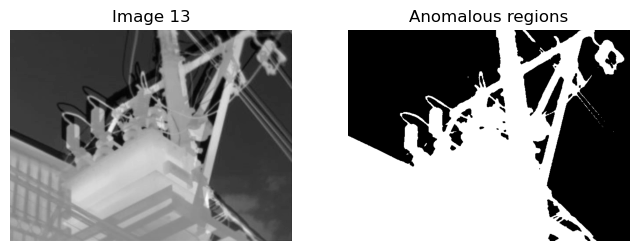

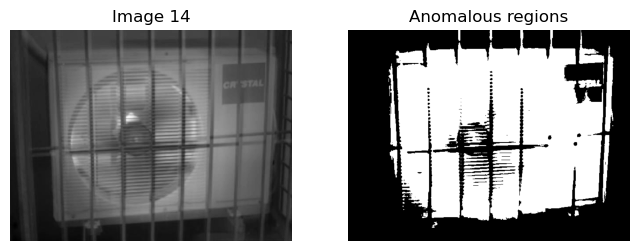

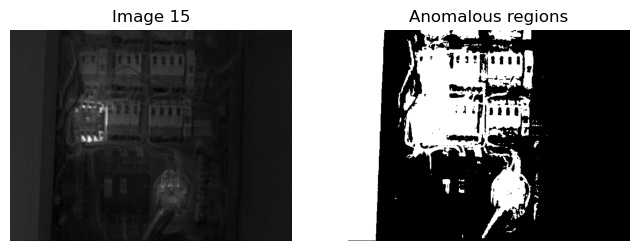

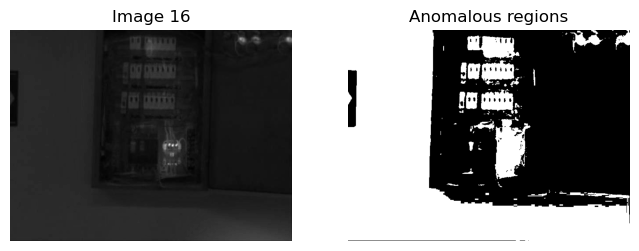

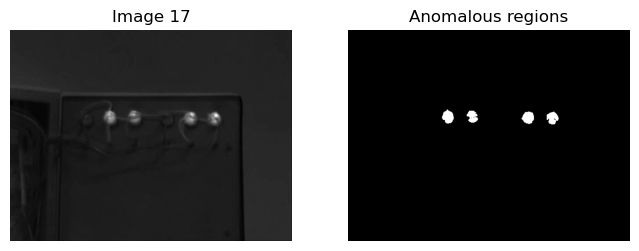

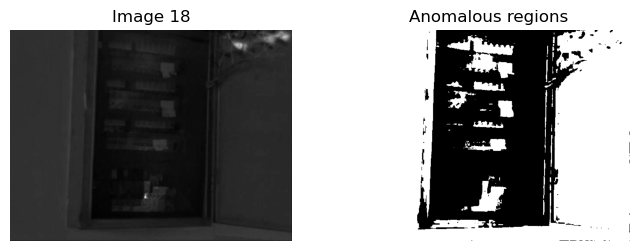

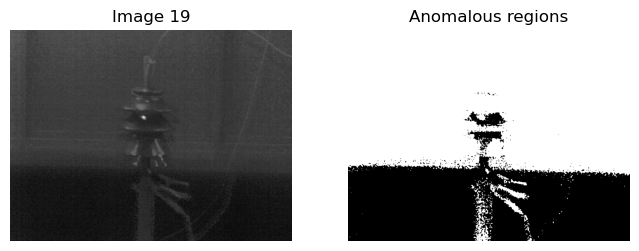

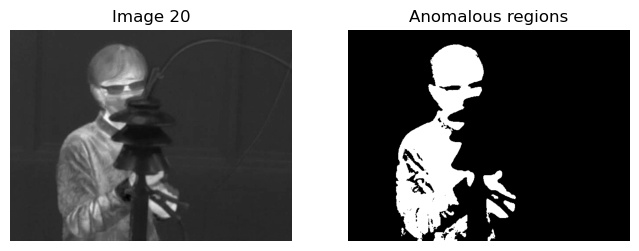

In [61]:
# grayscale images
img_gr = []
for file in file_list:
    im = io.imread(file, as_gray=True)
    img_gr.append(im)
    
# loop through the images and identify anomalous regions
for i, img in enumerate(img_gr):
    # apply thresholding to identify anomalous regions
    thresh = filters.threshold_otsu(img)
    anomalous = img > thresh
    
    # plot the original image and the anomalous regions
    fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(f"Image {i+1}")
    ax[0].axis('off')
    ax[1].imshow(anomalous, cmap='gray')
    ax[1].set_title("Anomalous regions")
    ax[1].axis('off')
    plt.show()

### NDVI

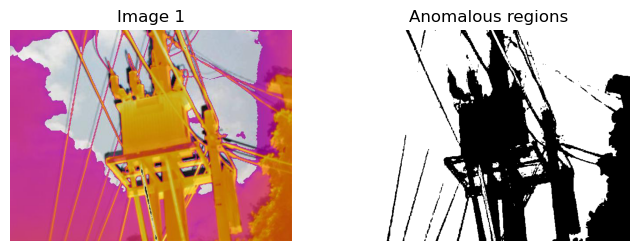

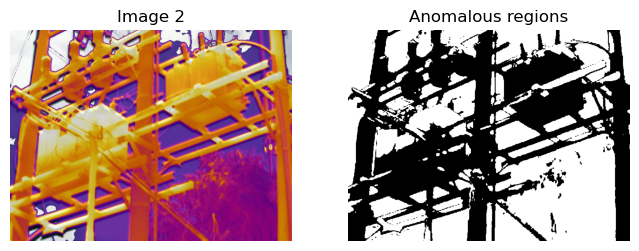

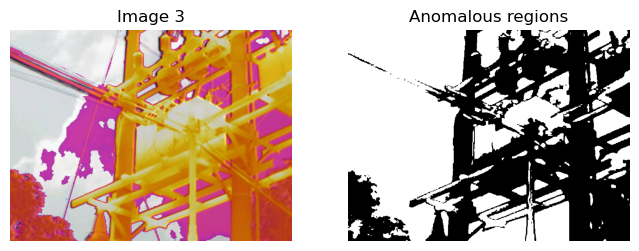

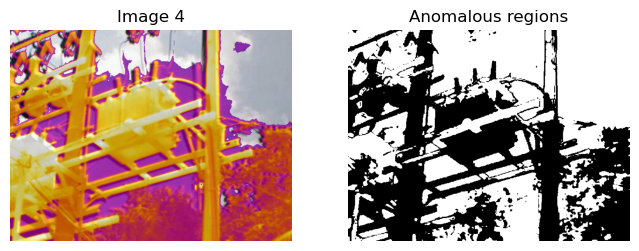

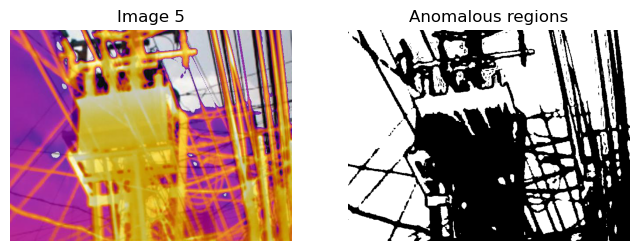

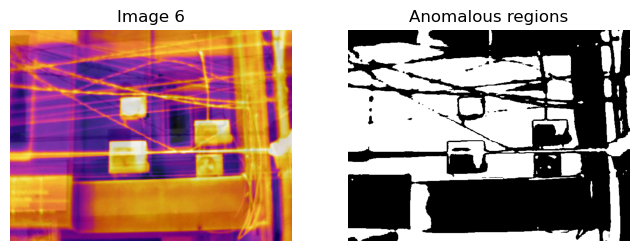

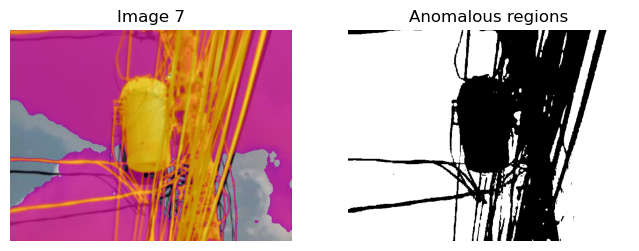

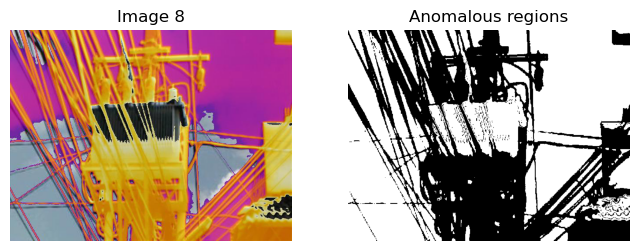

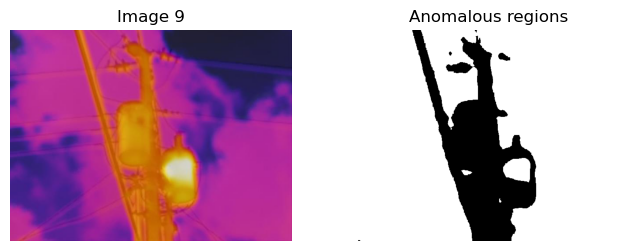

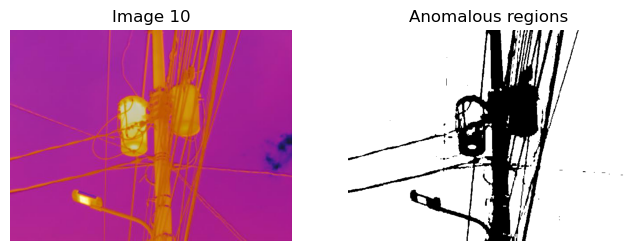

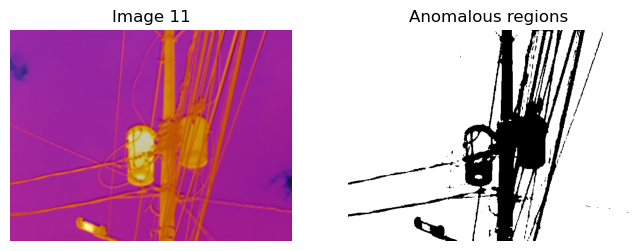

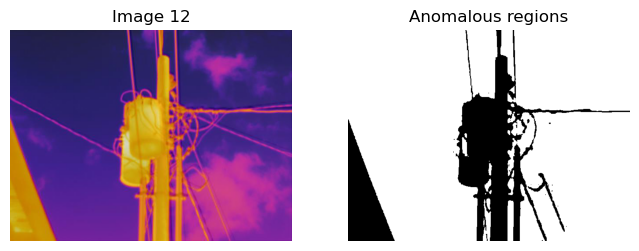

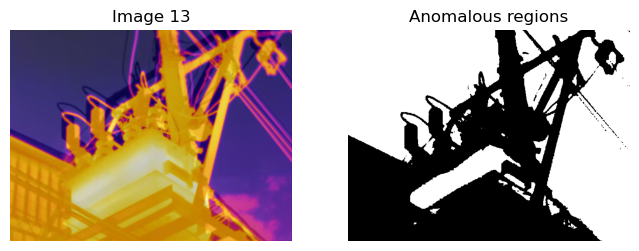

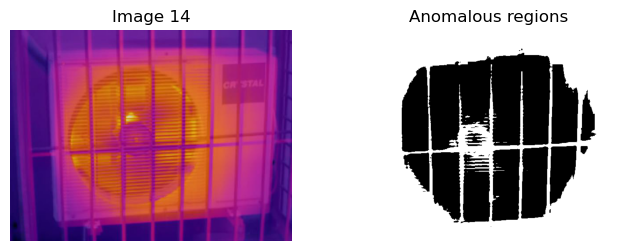

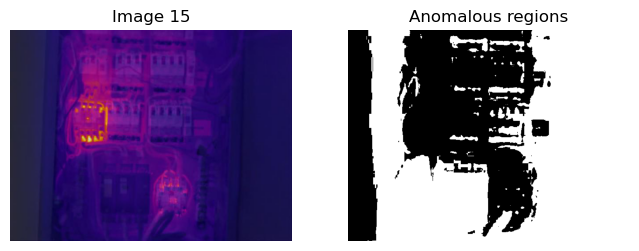

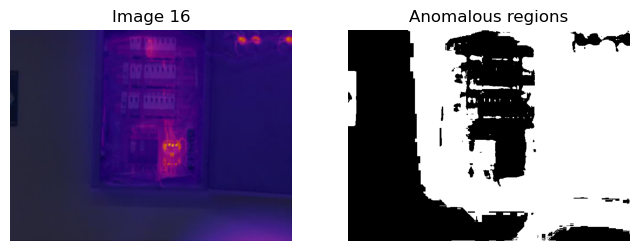

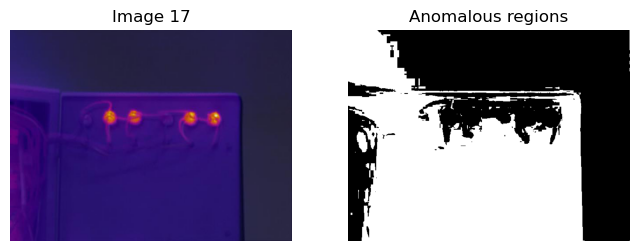

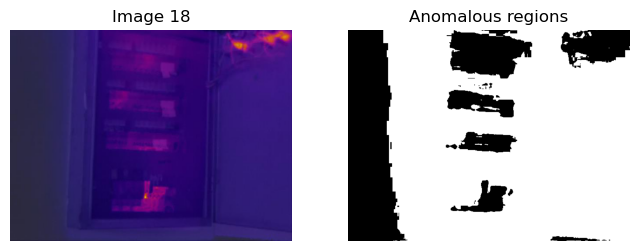

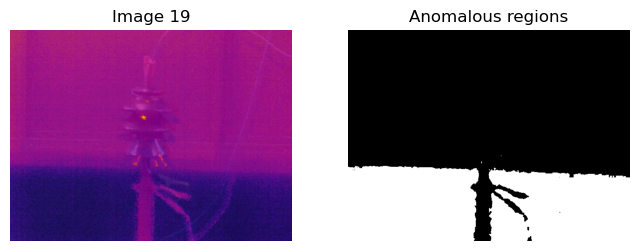

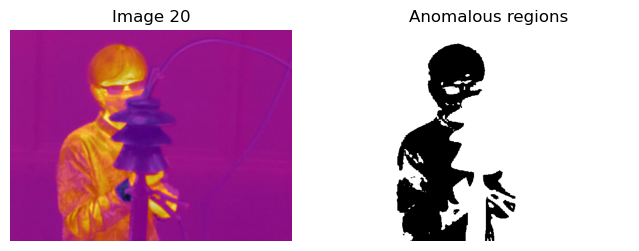

In [57]:
# load the images
img_df = io.imread_collection(file_list)

# loop through the images and identify anomalous regions
for i, img in enumerate(img_df):
    # convert image to NDVI color space
    nir = img[:, :, 2].astype(float)
    red = img[:, :, 0].astype(float)
    nir[nir <= 0.0001] = 0.0001
    red[red <= 0.0001] = 0.0001
    
    img_ndvi = (nir - red) / (nir + red)
    
    # apply thresholding to identify anomalous regions
    thresh = filters.threshold_otsu(img_ndvi)
    anomalous = img_ndvi > thresh
    
    # plot the original image and the anomalous regions
    fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title(f"Image {i+1}")
    ax[0].axis('off')
    ax[1].imshow(anomalous, cmap='gray')
    ax[1].set_title("Anomalous regions")
    ax[1].axis('off')
    plt.show()

Better results require more tuning. For more accurate and trustworthy analysis, higher-quality photos are recommended.